Universidade Federal de Pernambuco <br>
Disciplina: Economia Monetária <br>
Professor: Rafael Vasconcelos <br>
Alunos: João Pedro Miranda, Paulo Silva, Pedro Moraes

Duas pessoas fizeram investimentos em renda fixa que paga a Taxa de juros Over/Selic acumulada durante o período de investimento. A capitalização é descontínua composta mês-a-mês. Enzo investiu R\$8000000,00 em janeiro de 2016 e Maria investiu R\$ 100000,00 na mesma data. No momento do investimento, ambos planejavam manter ininterruptamente o investimento até o final de novembro de 2022. Contudo, em março de 2020, Enzo resgatou todo o seu investimento como precaução frente às consequências inesperadas da pandemia do Covid-19. Em janeiro de 2021, com o arrefecimento da pandemia do Covid-19, Enzo decidiu investir todo o montante resgatado em março de 2020 e investir no mesmo produto de investimento. Baseada nesse ambiente de investimento, nas informações 1 e 2 e no conteúdo da disciplina até o momento, responda os problemas abaixo.

Problema 1: Elabore uma figura com as taxas de juros acumuladas (nominal e real) durante os respectivos períodos de investimento de Maria e de Enzo entre janeiro de 2016 e novembro de 2022. Baseado nessa figura, discuta sobre as diferentes reações das demandas individuais por ativos financeiros de Enzo e Maria frente às mudanças dos riscos e das incertezas no início da pandemia dado às informações disponíveis.

Problema 2: Em dezembro de 2022, Enzo e Maria estão reavaliando se mantém ou não
o produto de investimento dado às informações disponíveis. Frente ao cenário macro global, quais seriam os motivos pelos quais Enzo ou Maria resgatariam o investimento? Quais seriam os motivos pelos quais Enzo ou Maria manteriam o investimento?

In [1]:
# Importações
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [2]:
# Excluindo eixos do topo e direito dos gráficos
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
# Lendo dados
data = pd.read_excel("/content/ipeadata[12-12-2022-09-43].xlsx",dtype={"Data":str})

In [4]:
# Visualizando dados
data

,Data,"Taxa de juros - Over / Selic - acumulada no mês - (% a.m.) - Banco Central do Brasil, Boletim, Seção mercado financeiro e de capitais (Bacen/Boletim/M. Finan.) - BM12_TJOVER12 -","IPCA - geral - índice (dez. 1993 = 100) - - - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_IPCA12 -"
0,1974.01,1.46,NaN
1,1974.02,1.15,NaN
2,1974.03,1.16,NaN
3,1974.04,1.21,NaN
4,1974.05,1.24,NaN
...,...,...,...
582,2022.07,1.03,6411.95
583,2022.08,1.17,6388.87
584,2022.09,1.07,6370.34
585,2022.10,1.02,6407.93


In [5]:
# Renomeando colunas
data.columns=["Data","selic","ipca"]

In [6]:
# Corrigindo o objeto para data e colocando como indice
data["Data"]=data["Data"].astype("str").str.replace(".","-")
data["Data"]=pd.to_datetime(data["Data"]).dt.strftime("%Y-%m")
data.set_index(data["Data"],inplace=True,drop=True)

<ipython-input-6-589c44adfad8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Data"]=data["Data"].astype("str").str.replace(".","-")


In [7]:
# Recortando período de tempo para t>=2016
data = data.loc[data["Data"]>="2015-12"]

Formula: $Inflacao_{Mensal}=\frac{ipca_{t}-ipca_{t-1}}{ipca_{t-1}}$

In [8]:
# Calculando inflação mensal
data["inflacao_Mensal"]=(data["ipca"]-data["ipca"].shift(1))/data["ipca"].shift(1) * 100

<ipython-input-8-d2d2c046ea3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["inflacao_Mensal"]=(data["ipca"]-data["ipca"].shift(1))/data["ipca"].shift(1) * 100


Formula: $Juros\ real = [\frac{1+\frac{selic\_ over}{100}}{1+\frac{selic\_ over}{100}}-1]*100$

In [9]:
# Calculando juros real (selic over)
data["juros_real"]=((1+(data["selic"]/100))/(1+(data["inflacao_Mensal"]/100))-1) * 100

<ipython-input-9-f0ec625539e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["juros_real"]=((1+(data["selic"]/100))/(1+(data["inflacao_Mensal"]/100))-1) * 100


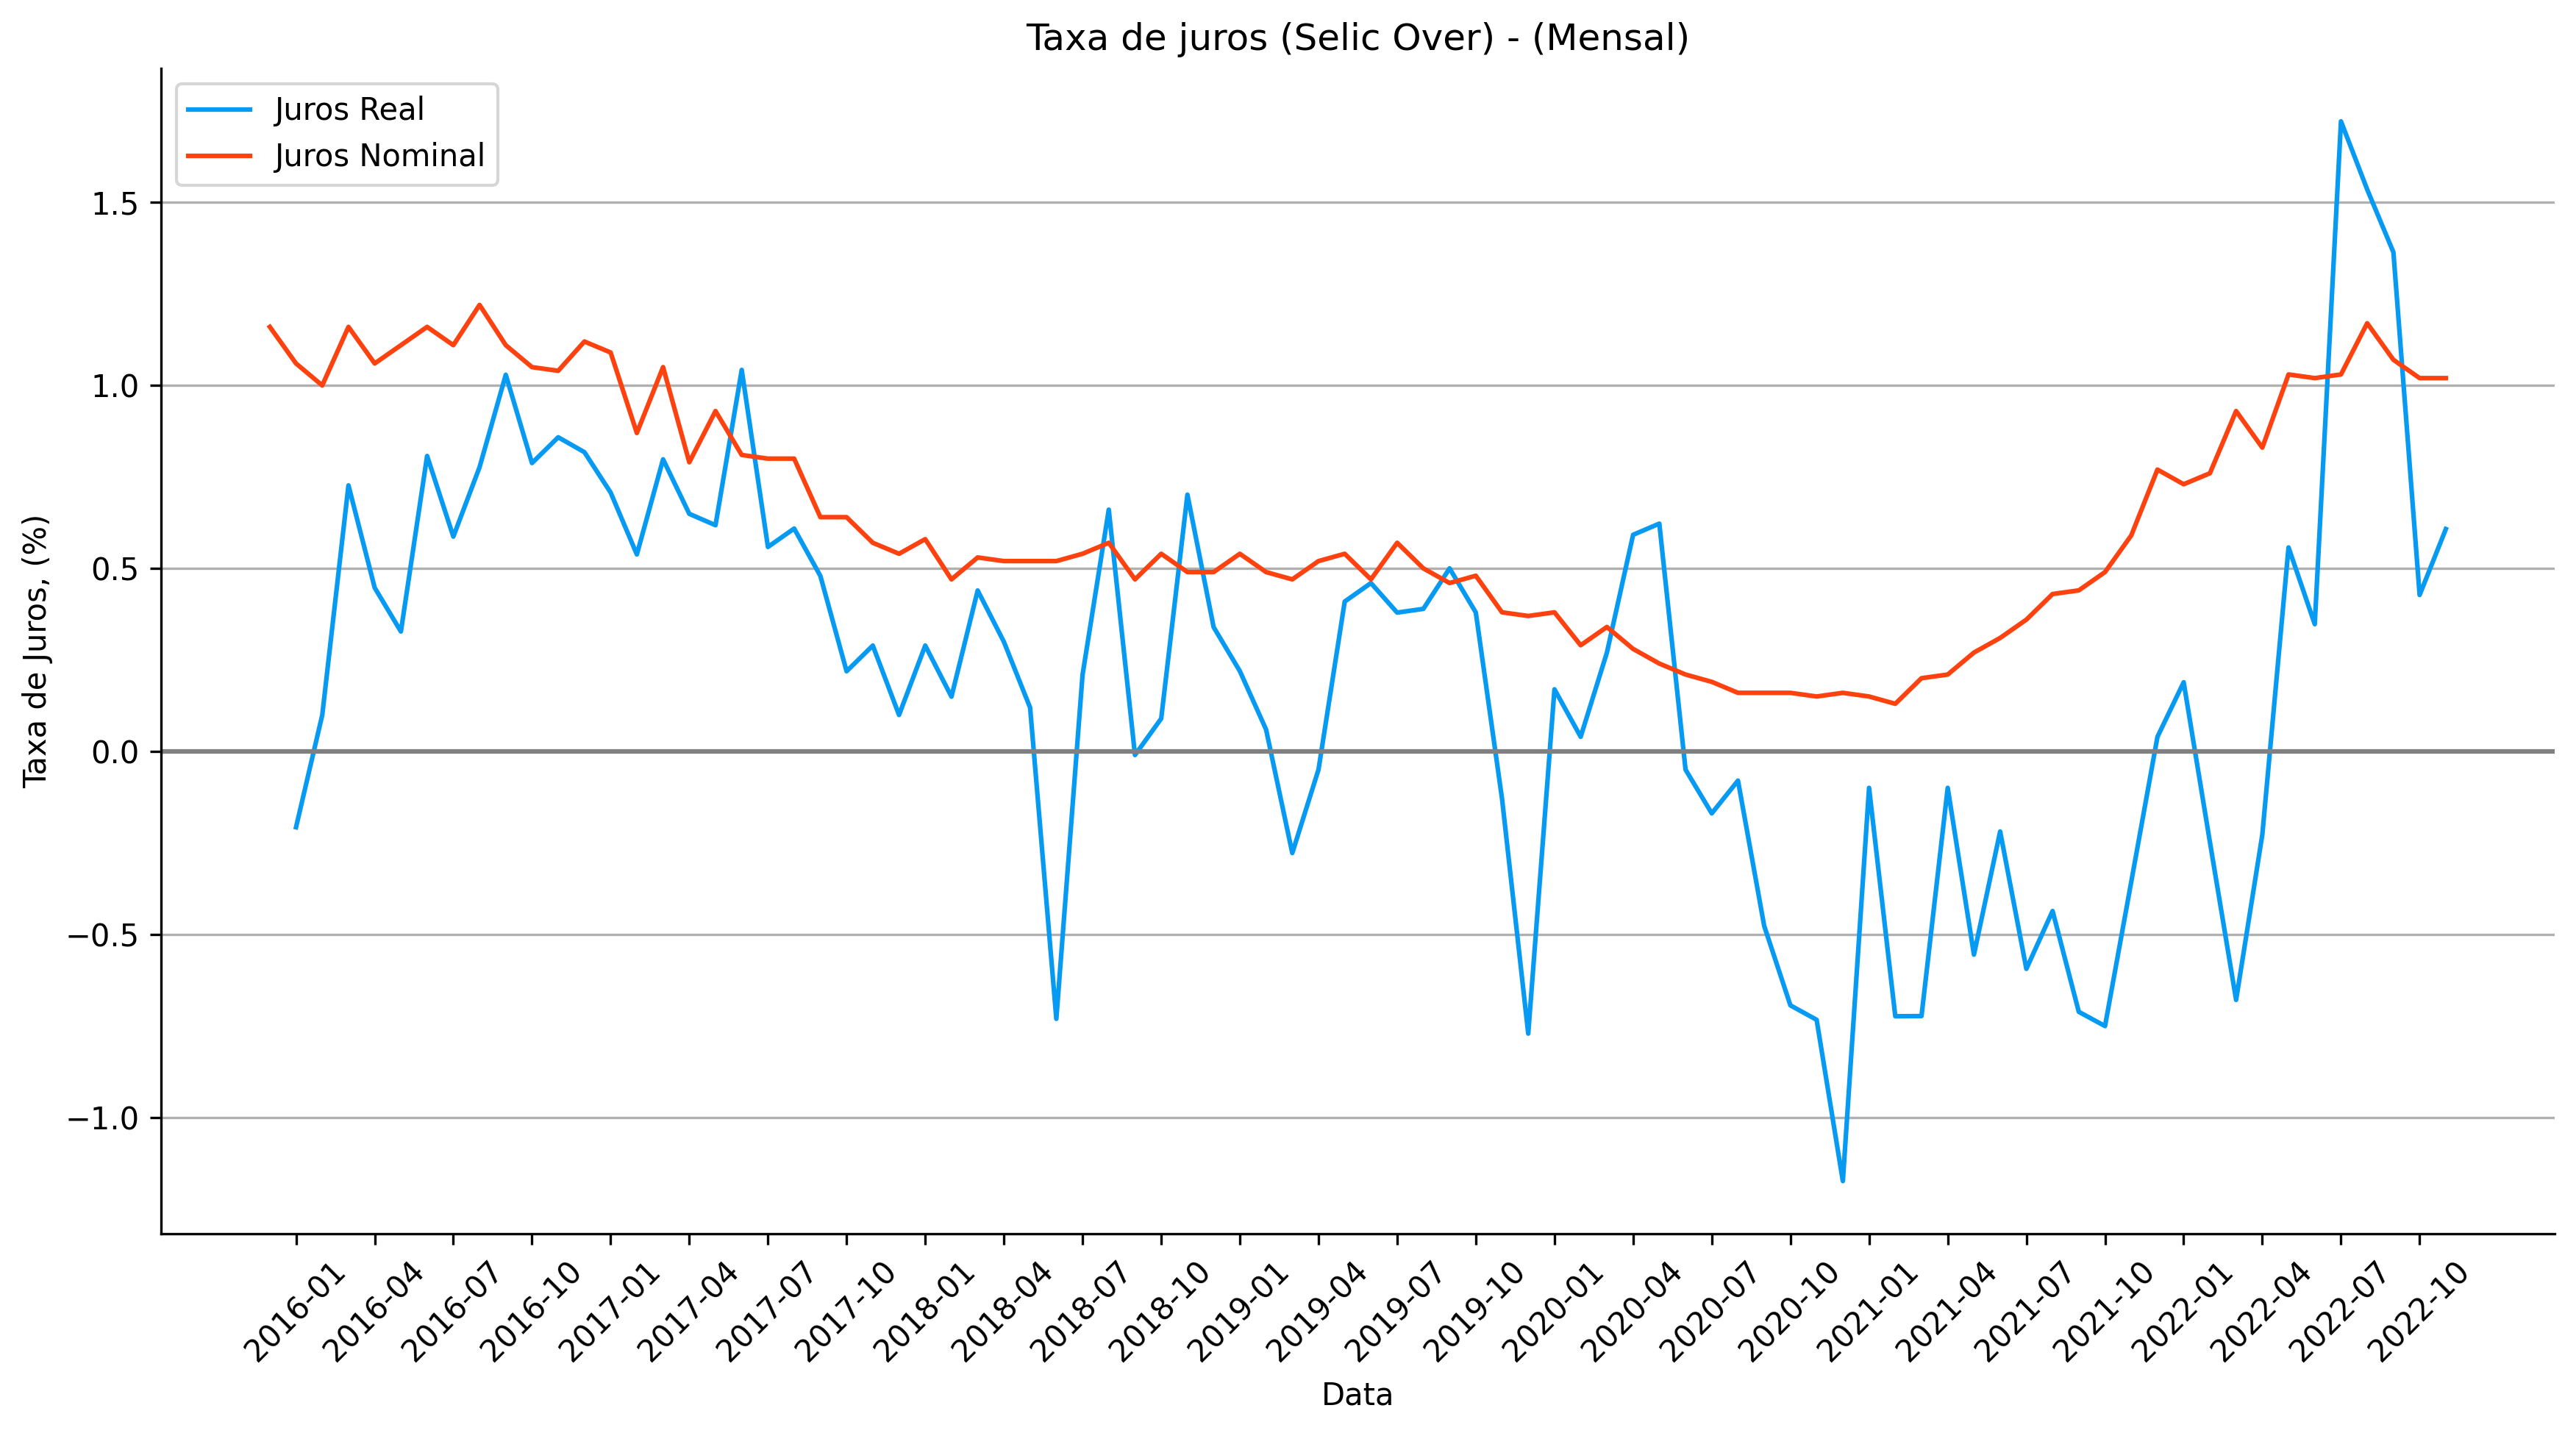

In [10]:
# Plotando juros
plt.figure(figsize=(14, 7), dpi=300)
plt.title('Taxa de juros (Selic Over) - (Mensal)')
plt.plot(data["Data"],data["juros_real"], label="Juros Real",color="#069af3")
#plt.plot(data["Data"],data["inflacao_Mensal"], label="Inflação",color="#069af3")
plt.plot(data["Data"],data["selic"], label="Juros Nominal",color="#fe420f")
plt.xlabel("Data")
plt.ylabel("Taxa de Juros, (%)")
plt.axhline(y = 0, color = '#808080', linestyle = '-')
plt.xticks(pd.date_range(data.index[1], data.index[-1], freq='3m').strftime('%Y-%m'),rotation=45)
plt.grid(visible=True, axis="y")
plt.legend()
plt.show()

In [11]:
# Eliminando linha de 2015
data.drop("2015-12",axis=0,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
# Calculando Inflação mensal acumulada
data["inflacaoAcumulada"]=((1+data["inflacao_Mensal"]/100).cumprod()-1)*100

<ipython-input-12-062a9a91d0d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["inflacaoAcumulada"]=((1+data["inflacao_Mensal"]/100).cumprod()-1)*100


In [13]:
# Calculando taxa de juros nominal acumulada
data["jurosNominalAcumulado"]=((1+data["selic"]/100).cumprod()-1)*100

<ipython-input-13-c4d23be4ef37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["jurosNominalAcumulado"]=((1+data["selic"]/100).cumprod()-1)*100


In [14]:
# Calculando taxa de juros real acumulada
data["jurosRealAcumulado"]=((1+data["juros_real"]/100).cumprod()-1)*100

<ipython-input-14-90835827f15d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["jurosRealAcumulado"]=((1+data["juros_real"]/100).cumprod()-1)*100


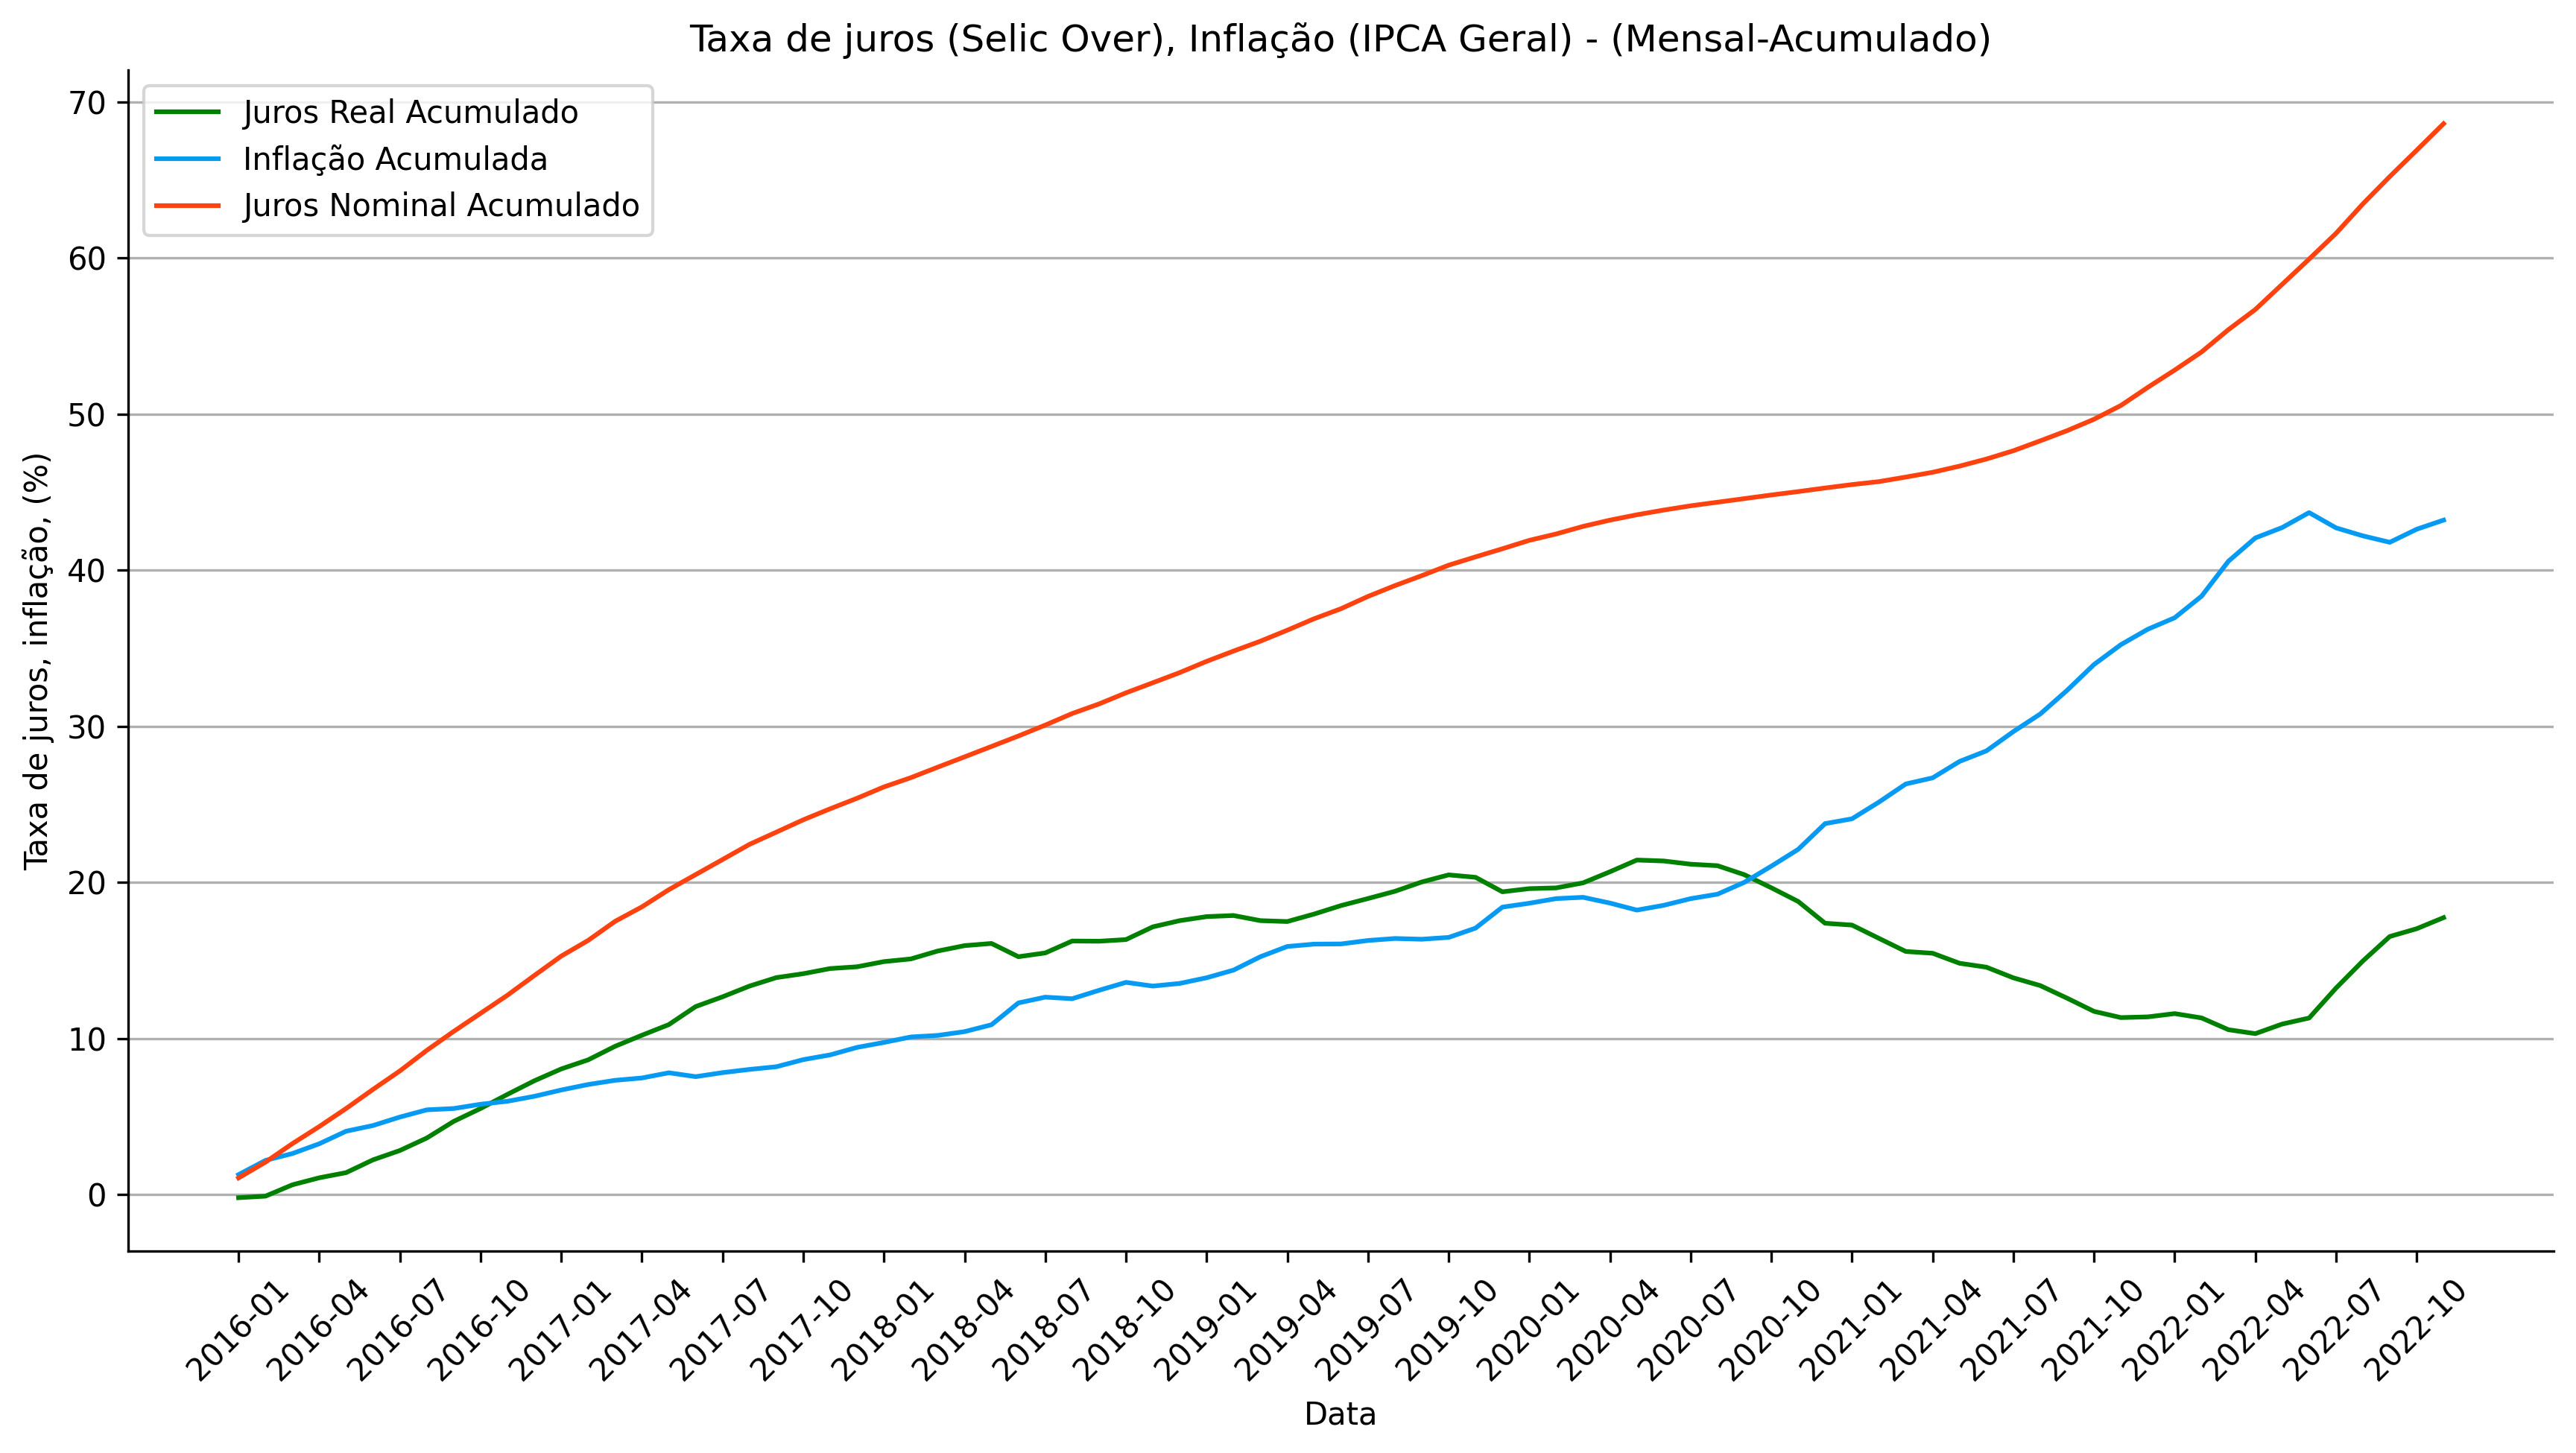

In [15]:
# Plotando juros
plt.figure(figsize=(14, 7), dpi=300)
plt.title('Taxa de juros (Selic Over), Inflação (IPCA Geral) - (Mensal-Acumulado)')
plt.plot(data["Data"],data["jurosRealAcumulado"], label="Juros Real Acumulado",color="#008000")
plt.plot(data["Data"],data["inflacaoAcumulada"], label="Inflação Acumulada",color="#069af3")
plt.plot(data["Data"],data["jurosNominalAcumulado"], label="Juros Nominal Acumulado",color="#fe420f")
plt.xlabel("Data")
plt.ylabel("Taxa de juros, inflação, (%)")
plt.xticks(pd.date_range(data.index[0], data.index[-1], freq='3m').strftime('%Y-%m'),rotation=45)
plt.grid(visible=True, axis="y")
plt.legend()
plt.show()